In [1]:
#Imported required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import logging

In [2]:
data = pd.read_csv('./construction_materials_dataset.csv')

In [3]:
data.head(3)

,material_id,material_name,material_application,climate_zone,durability_requirement,budget_constraint,supplier_name,availability_status,lead_time_days,project_type,project_specifications_match_score,sustainability_focus,supplier_contact_number
0,MAT2000,Limestone,Insulation,Moderate,50+ years,Premium,Supplier_41,Limited,1,Tunnels,0.55,Standard,+91 9088866000
1,MAT2001,Marble,Flooring,Moderate,25-50 years,Standard,Supplier_20,Out of Stock,15,Residential,0.96,Standard,+91 9001555196
2,MAT2002,Paint,Other,Dry,10-25 years,Economy,Supplier_16,Out of Stock,34,Infrastructure,0.10,Standard,+91 99613 85211


In [4]:
data.shape

(1200, 13)

In [5]:
data.describe()

,lead_time_days,project_specifications_match_score
count,1200.000000,1200.000000
mean,30.310833,0.504950
std,17.171535,0.284841
min,1.000000,0.000000
25%,16.000000,0.270000
50%,31.000000,0.490000
75%,44.000000,0.750000
max,60.000000,1.000000


In [6]:
data.columns

Index(['material_id', 'material_name', 'material_application', 'climate_zone',
       'durability_requirement', 'budget_constraint', 'supplier_name',
       'availability_status', 'lead_time_days', 'project_type',
       'project_specifications_match_score', 'sustainability_focus',
       'supplier_contact_number'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   material_id                         1200 non-null   object 
 1   material_name                       1200 non-null   object 
 2   material_application                1200 non-null   object 
 3   climate_zone                        1200 non-null   object 
 4   durability_requirement              1200 non-null   object 
 5   budget_constraint                   1200 non-null   object 
 6   supplier_name                       1200 non-null   object 
 7   availability_status                 1200 non-null   object 
 8   lead_time_days                      1200 non-null   int64  
 9   project_type                        1200 non-null   object 
 10  project_specifications_match_score  1200 non-null   float64
 11  sustainability_focus         

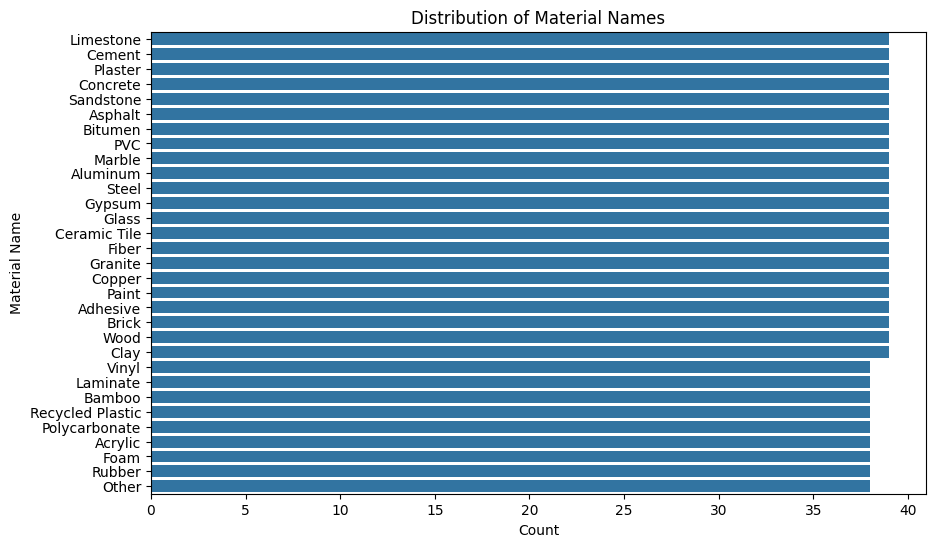

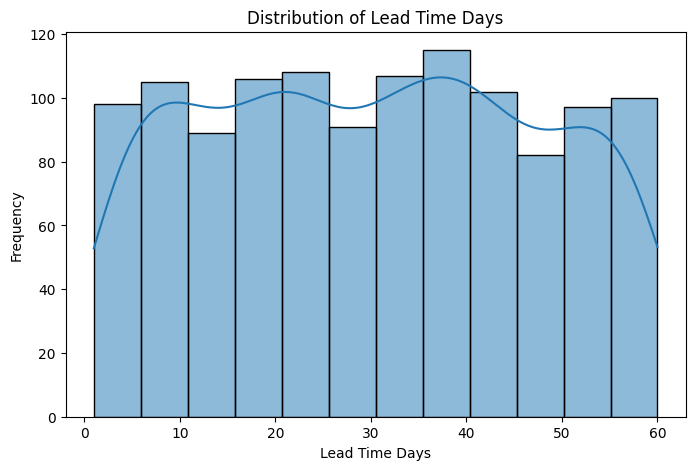

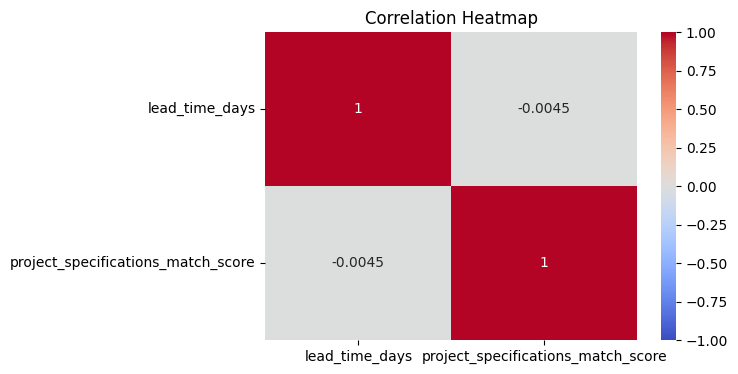

In [7]:
# Display basic info and missing values
print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Plot distribution of material_name
plt.figure(figsize=(10, 6))
sns.countplot(y='material_name', data=data, order=data['material_name'].value_counts().index)
plt.title('Distribution of Material Names')
plt.xlabel('Count')
plt.ylabel('Material Name')
plt.savefig('./material_names_distribution.png')
plt.show()

# Plot distribution of lead_time_days
plt.figure(figsize=(8, 5))
sns.histplot(data['lead_time_days'], kde=True)
plt.title('Distribution of Lead Time Days')
plt.xlabel('Lead Time Days')
plt.ylabel('Frequency')
plt.savefig('./lead_time_distribution.png')
plt.show()

# Correlation heatmap for numerical features
numerical_cols = ['lead_time_days', 'project_specifications_match_score']
plt.figure(figsize=(6, 4))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('./correlation_heatmap.png')
plt.show()

In [8]:
# Encode categorical variables
le_material = LabelEncoder()
le_climate = LabelEncoder()
le_project = LabelEncoder()
le_durability = LabelEncoder()
le_budget = LabelEncoder()
le_sustainability = LabelEncoder()
le_availability = LabelEncoder()

data['material_name_encoded'] = le_material.fit_transform(data['material_name'])
data['climate_zone_encoded'] = le_climate.fit_transform(data['climate_zone'])
data['project_type_encoded'] = le_project.fit_transform(data['project_type'])
data['durability_requirement_encoded'] = le_durability.fit_transform(data['durability_requirement'])
data['budget_constraint_encoded'] = le_budget.fit_transform(data['budget_constraint'])
data['sustainability_focus_encoded'] = le_sustainability.fit_transform(data['sustainability_focus'])
data['availability_status_encoded'] = le_availability.fit_transform(data['availability_status'])

# Define features and target
features = ['climate_zone_encoded', 'project_type_encoded', 'durability_requirement_encoded',
            'budget_constraint_encoded', 'sustainability_focus_encoded', 'availability_status_encoded',
            'lead_time_days', 'project_specifications_match_score']
target = 'material_name_encoded'

X = data[features]
y = data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_material.classes_))

Classification Report:
                  precision    recall  f1-score   support

         Acrylic       0.00      0.00      0.00         9
        Adhesive       0.00      0.00      0.00         9
        Aluminum       0.00      0.00      0.00         7
         Asphalt       0.00      0.00      0.00         6
          Bamboo       0.00      0.00      0.00         8
         Bitumen       0.00      0.00      0.00         7
           Brick       0.00      0.00      0.00         5
          Cement       0.00      0.00      0.00        15
    Ceramic Tile       0.00      0.00      0.00         5
            Clay       0.00      0.00      0.00         5
        Concrete       0.00      0.00      0.00         7
          Copper       0.25      0.12      0.17         8
           Fiber       0.00      0.00      0.00         8
            Foam       0.25      0.20      0.22         5
           Glass       0.00      0.00      0.00         8
         Granite       0.08      0.20      0.11 

c:\Users\KEERTI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KEERTI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KEERTI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [10]:
# Create user-item matrix (simplified: material-supplier interactions)
user_item_matrix = pd.pivot_table(data, values='project_specifications_match_score',
                                 index='material_name', columns='supplier_name',
                                 aggfunc='mean', fill_value=0)

# Compute similarity between materials
material_similarity = cosine_similarity(user_item_matrix)
material_similarity_df = pd.DataFrame(material_similarity, index=user_item_matrix.index,
                                     columns=user_item_matrix.index)

In [11]:
# Define Recommendation Function
def get_recommendations(climate_zone, project_type, durability, budget, sustainability, max_lead_time, min_match_score):
    try:
        # Encode inputs
        input_data = pd.DataFrame({
            'climate_zone_encoded': [le_climate.transform([climate_zone])[0]],
            'project_type_encoded': [le_project.transform([project_type])[0]],
            'durability_requirement_encoded': [le_durability.transform([durability])[0]],
            'budget_constraint_encoded': [le_budget.transform([budget])[0]],
            'sustainability_focus_encoded': [le_sustainability.transform([sustainability])[0]],
            'availability_status_encoded': [le_availability.transform(['In Stock'])[0]],
            'lead_time_days': [max_lead_time],
            'project_specifications_match_score': [min_match_score]
        })

        # Predict material
        predicted_material_encoded = rf_model.predict(input_data)[0]
        predicted_material = le_material.inverse_transform([predicted_material_encoded])[0]

        # Get similar materials via collaborative filtering
        similar_materials = material_similarity_df[predicted_material].sort_values(ascending=False)[1:3].index.tolist()

        # Get supplier details
        recommendations = []
        for material in [predicted_material] + similar_materials:
            material_data = data[data['material_name'] == material][['material_name', 'supplier_name', 'supplier_contact_number', 'lead_time_days', 'project_specifications_match_score']]
            recommendations.append(material_data.iloc[0])

        return pd.DataFrame(recommendations)
    except Exception as e:
        logging.error(f"Error in recommendation: {e}")
        return pd.DataFrame()

In [12]:
# Save Model and Encoders
joblib.dump(rf_model, './rf_model.joblib')
joblib.dump(le_material, './le_material.joblib')
joblib.dump(le_climate, './le_climate.joblib')
joblib.dump(le_project, './le_project.joblib')
joblib.dump(le_durability, './le_durability.joblib')
joblib.dump(le_budget, './le_budget.joblib')
joblib.dump(le_sustainability, './le_sustainability.joblib')
joblib.dump(le_availability, './le_availability.joblib')

['./le_availability.joblib']

In [13]:
# Define Prediction Function
def predict_recommendations(climate_zone, project_type, durability, budget, sustainability, max_lead_time, min_match_score):
    recommendations = get_recommendations(climate_zone, project_type, durability, budget, sustainability, max_lead_time, min_match_score)
    if not recommendations.empty:
        print("Recommended Materials and Suppliers:")
        print(recommendations[['material_name', 'supplier_name', 'supplier_contact_number', 'lead_time_days', 'project_specifications_match_score']])
    else:
        print("No recommendations found.")

In [14]:
# Test Prediction 1
predict_recommendations(
    climate_zone='Moderate',
    project_type='Residential',
    durability='25-50 years',
    budget='Standard',
    sustainability='Eco-friendly',
    max_lead_time=30,
    min_match_score=0.8
)

Recommended Materials and Suppliers:
   material_name supplier_name supplier_contact_number  lead_time_days  \
24        Bamboo   Supplier_11          +91 7562411160              26   
7          Brick   Supplier_23          +91 9057757757              32   
4         Copper   Supplier_77         +91 94166 37805              31   

    project_specifications_match_score  
24                                0.86  
7                                 0.38  
4                                 0.46  
